# extraccion de datos

Para descargardatos lo que podemos hacer es:

primero filtrar por
variable>frecuencia> fuente de la informacion  (source id)> despues EPERIMENTO ID > ya despues podemos seguir filtrando bien se la presicion, la resoluicion ETC


 EPERIMENTO ID : este tiene los distintos tipos de modelos  (historical)

variable label =   r1i1p1f1

frequecia = mon 

Realm = atmos 

variable = pr 



In [ ]:
fecha_inicio='1850-03-01 00:00:00'
fecha_fin='2011-03-01 00:00:00'

lat_bnd = [-87.470100]
lon_bnd=[1.6875]

data_delimited = data.sel(lat = slice(*lat_bnd),lon=slice(*lon_bnd), time=slice(fecha_inicio, fecha_fin))
data_delimited

# extracicon masiva de informacion

In [1]:
import requests
import numpy as np

In [ ]:

# *! aqui basicmanete lo que se esta haciendo es una forma automatica para descargar informacion 
User = "xxxxx"
paswor = "yyyy"
years = np.arange(1985 , 2015)

for i in years:
   
    url = "identificacion del link de descarga"+ str(i) + '.nc'
    r = requests.get(url, auth=(User, paswor), allow_redirects= True)
    open(str(years)+".gz", "wb").write(r.content)


## Para extraer todo de un archivo comprimido

In [10]:
import patoolib
import os

In [ ]:
ubicacio_carpeta = 'xxxxx'

for i in os.listdir(ubicacio_carpeta):
    if i[-3:] == ".gz":
        patoolib.extract_archive(i , outdir=ubicacio_carpeta)
    

### si llegado el caso nos sle sin la extencion requerida podemos usar

In [ ]:
ubicacio_carpeta = 'xxxxx'

for i in os.listdir(ubicacio_carpeta):
    os.chdir(ubicacio_carpeta)
    os.rename(i , i + ".nc")
    
    

## librerias basicas


In [2]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr # sirve para administrar los archivos net cdf

# lo primero que toca hacer es extraer los datos para eso hay 2 formas

In [17]:

data1 = xr.open_dataset('./archivos/1.nc')
                      
print(data1.data_vars)


Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...


In [3]:
data2 = Dataset('./archivos/1.nc')
print(type(data2))

<class 'netCDF4._netCDF4.Dataset'>


## ahora lo que se debe hacer es revisar que tenemos dentro del netcdf

In [24]:
print(data2.variables.keys())

dict_keys(['time', 'time_bnds', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'pr'])


In [35]:
time = data2.variables['time']
print(time) # *! esta parte es muy importante ya que con esta podemos saber la informacion util, como el nombre completo de una variable

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-1-1 00:00
    calendar: 365_day
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (1980,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [45]:
pr = data2.variables['pr']
print('DIMENCION' , pr.dimensions)
print('INFORMACION GENERA' ,pr)

DIMENCION ('time', 'lat', 'lon')
INFORMACION GENERA <class 'netCDF4._netCDF4.Variable'>
float32 pr(time, lat, lon)
    standard_name: precipitation_flux
    long_name: Precipitation
    comment: includes both liquid and solid phases
    units: kg m-2 s-1
    original_name: precip
    cell_methods: area: time: mean
    cell_measures: area: areacella
    missing_value: 1e+20
    _FillValue: 1e+20
    history: 2019-07-01T12:19:04Z altered by CMOR: Inverted axis: lat.
unlimited dimensions: time
current shape = (1980, 160, 320)
filling on


Las diemnciones para todo el tema de la precipitacion se define de la sigente forma:

time = 1980 (o sea que se replico 1980 mayas de informacion)

lat = 160 (o sea que hay 160 linea horizontales por cada maya)

log = 320 (que hay 320 linea verticale pr cada maya)

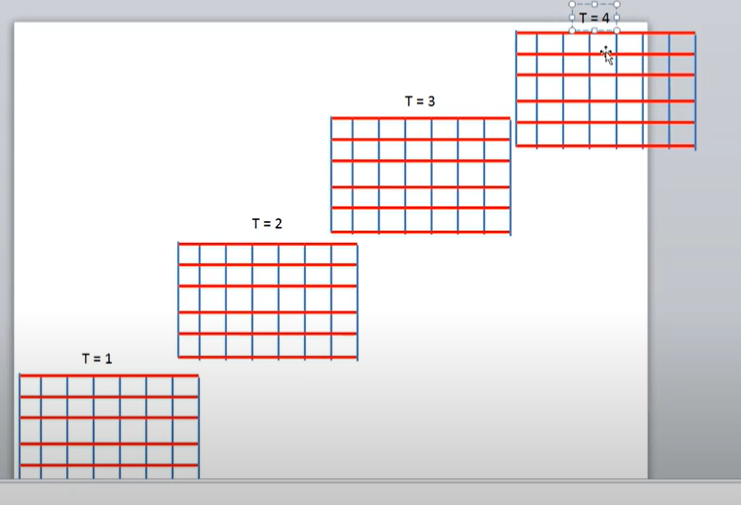

## Accediendo a los datos

In [8]:
data3 = data2.variables['time_bnds'][:5]
data4 = data2.variables['time'][:5]
print(data3)
print(data4)

[[  0.  31.]
 [ 31.  59.]
 [ 59.  90.]
 [ 90. 120.]
 [120. 151.]]
[ 15.5  45.   74.5 105.  135.5]


# EXTRACCION DE LA INFORMACION PARA UNA SERIE DE TIEMPO

In [ ]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd

data = Dataset('./archivos/1.nc') # origen del dato de prueba CMIP6.CMIP.UA.MCM-UA-1-0.historical.r1i1p1f1.Amon.pr.gn

# *! aqui lo unico que se hace es buscar el vlor ams cercano a la latitud y longitud que nosotros queremos, en este caso
# *! el valor mas cercano a santa rosa de osos
lat_S =   6.646697
lon_S = -75.460673

lat = data.variables['lat'][:]
lon = data.variables['lon'][:]

lat_V = (lat - lat_S)**2
lon_V = (lon - lon_S)**2

min_lat = lat_V.argmin()
min_lon = lon_V.argmin()


# ** aqui extraemos las variables de precipitacion


# ** aqui generamos un rango de tiempo para nuestra serie 
star_date = data.variables['time'].units[11:19]
end_date = '1855-12-31'
data_range = pd.date_range(start=star_date , end= end_date)

# *? aqui lo que hacemos es crear un data frame vacio y una matriz de numeros la cual va a simvolizar los valores 
df = pd.DataFrame(0, columns= ['precipitacion'], index= data_range)
dt = np.arange(0, 1980) # data.variables['time'].size
print(df.size , dt.size)


# *! aqui ya comenzamos a rellenar en dataframe , como para esa lat y lon tan solo hay 1980 valores lo logico es que xistan 1980 fechas
# *! lo que toca entender es la distribucion de los datos , o sea sin son valores diarios, mensales o anuales.
for i in dt:
    df.iloc[i] = prec[i , min_lat , min_lon ]



print(df)

# ** aqui vamos a guardar el df como csv
df.to_csv('precipitacion_santarosa_1980_2014.csv')




In [ ]:
data.variables['pr']

In [ ]:

# *! MANIPUACION DE FECHAS NETCDF

import netCDF4 as nc
dataset = nc.Dataset('./archivos/1.nc', 'r')
# Accede a la variable de tiempo
time_variable = dataset['time']

# Obtiene los valores de fecha y hora
dates = nc.num2date(time_variable[:], units=time_variable.units, calendar=time_variable.calendar)

# ** Imprime TODAS las fechas del netCDF
for date in dates:
    print(date)
    
    
 
#** con esto filtramos la primera y la ultima fecha   
# Accede a la variable de tiempo
time_variable = dataset['time']

# Obtiene las unidades de tiempo y el calendario
unidades = time_variable.units
calendario = time_variable.calendar

first_date = nc.num2date(time_variable[0], units=unidades, calendar=calendario)

print("Primera fecha:", first_date)

last_date = nc.num2date(time_variable[-1], units=unidades, calendar=calendario)

print("Última fecha:", last_date)


# ** si tan solo queremos obtener el año podemos usar
# Obtiene el año de la primera fecha
first_year = first_date.year

# Obtiene el año de la última fecha
last_year = last_date.year

print("Año de la primera fecha:", first_year)
print("Año de la última fecha:", last_year)

In [ ]:
print(prec[2.2 , min_lat , min_lon ])

In [ ]:
print(data.variables['time'].units)

## Y si tenemos mas de un cetCDF??

In [36]:
import glob
import os
import numpy as np
import pandas as pd
from netCDF4 import Dataset, num2date
from collections.abc import Iterable
import netCDF4 as nc

def extraccion_1(directorio= '../netCDF/*.nc', directorio_raiz = '../netCDF', ubixaciones = '../XLSM/UBICACIONES.csv'):
    # *! identidicador de fechas automatico
    all_year = []# **con esto pordemo ver si glob esta leyendo y uniendo dentro de data todos los netCDF

    for i in glob.glob(directorio):

        data = Dataset(i, 'r') 
        time = data.variables['time']
        unidades = time.units
        calendario = time.calendar
        first_date = nc.num2date(time[0], units=unidades, calendar=calendario)
        first_year = first_date.year
        all_year.append(first_year)
        
    #print(all_year)
    
    

    # *! Cambio de nombres automaticos
    # Directorio que deseas explorar
    directorio = directorio_raiz  # Reemplaza con la ruta adecuada

    # Obtén una lista de nombres de archivos en el directorio
    Nombres_originales = os.listdir(directorio)

    # Itera a través de los nombres de archivos originales y los años
    for nombre_original, año in zip(Nombres_originales, all_year):
        # Construye el nuevo nombre del archivo con el año
        nombre_nuevo = f'{año}.nc'

        # Rutas de archivo original y nuevo
        ruta_original = os.path.join(directorio, nombre_original)
        ruta_nueva = os.path.join(directorio, nombre_nuevo)

        # Renombra el archivo
        os.rename(ruta_original, ruta_nueva)

            
            
    # *! este es el mejor metodo para generar las fechas necesarios dentro del DF
    time_variable = data['time']

    # Obtiene los valores de fecha y hora
    dates = nc.num2date(time_variable[:], units=time_variable.units, calendar=time_variable.calendar)

    # ** Imprime TODAS las fechas del netCDF
    '''for date in dates:
        print(date)'''
        
    # *! Creacion de un DF vacio
    df = pd.DataFrame(0.0 , columns= ['Precipitacion'], index = dates )



    # ** ahora debemos definir el lugar, lat y lon de los distintos puntos de interes mediante un csv

    locations = pd.read_csv(ubixaciones)
    for index, row in locations.iterrows():
        lugar = row['nombre']
        latitud = row['lat']
        longotud = row['lon']
  
        all_year.sort(reverse= False)
        
        for i in all_year:
            data = Dataset('../netCDF/'+str(i)+'.nc', 'r')
            lat = data.variables['lat'][:]
            lon = data.variables['lon'][:]

            lat_V = (lat - latitud)**2
            lon_V = (lon - longotud)**2

            min_lat = lat_V.argmin()
            min_lon = lon_V.argmin()
            
            prec = data.variables['pr']
            
            # ** aqui vamos a exrtaer la fecha de inicio y la de fin
            time_variable = data['time']
            # Obtiene las unidades de tiempo y el calendario
            time_variable = data['time']
            dates = nc.num2date(time_variable[:], units=time_variable.units, calendar=time_variable.calendar)
                
            for x in np.arange(0, len(dates)):
                df.loc[dates[x]]['Precipitacion'] = prec[x, min_lat , min_lon]

        df.to_csv(f'../CSV_OUT/{lugar}.csv')




In [37]:
extraccion_1()

In [22]:
print(df)

                     Precipitacion
1990-01-16 12:00:00   1.827328e-18
1990-02-15 00:00:00   2.417842e-17
1990-03-16 12:00:00   6.303948e-06
1990-04-16 00:00:00   6.013225e-05
1990-05-16 12:00:00   3.299883e-05
...                            ...
2009-08-16 12:00:00   8.884512e-05
2009-09-16 00:00:00   7.754129e-05
2009-10-16 12:00:00   8.823462e-05
2009-11-16 00:00:00   9.627722e-06
2009-12-16 12:00:00   1.910288e-16

[240 rows x 1 columns]


# CREAR UN MAPA QUE INTERPRETE LOS DATOS

In [ ]:

# *! importtamos las librerias necesrias

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # ** documentacion https://matplotlib.org/basemap/api/basemap_api.html
# *! MANIPUACION DE FECHAS NETCDF

import netCDF4 as nc
dataset = nc.Dataset('./archivos/1.nc', 'r')

lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
time = data.variables['time'][:]
preci = data.variables['pr'][:]

NameError: name 'data' is not defined

In [19]:
print(lons)

[  0.      1.875   3.75    5.625   7.5     9.375  11.25   13.125  15.
  16.875  18.75   20.625  22.5    24.375  26.25   28.125  30.     31.875
  33.75   35.625  37.5    39.375  41.25   43.125  45.     46.875  48.75
  50.625  52.5    54.375  56.25   58.125  60.     61.875  63.75   65.625
  67.5    69.375  71.25   73.125  75.     76.875  78.75   80.625  82.5
  84.375  86.25   88.125  90.     91.875  93.75   95.625  97.5    99.375
 101.25  103.125 105.    106.875 108.75  110.625 112.5   114.375 116.25
 118.125 120.    121.875 123.75  125.625 127.5   129.375 131.25  133.125
 135.    136.875 138.75  140.625 142.5   144.375 146.25  148.125 150.
 151.875 153.75  155.625 157.5   159.375 161.25  163.125 165.    166.875
 168.75  170.625 172.5   174.375 176.25  178.125 180.    181.875 183.75
 185.625 187.5   189.375 191.25  193.125 195.    196.875 198.75  200.625
 202.5   204.375 206.25  208.125 210.    211.875 213.75  215.625 217.5
 219.375 221.25  223.125 225.    226.875 228.75  230.625 232.5  

In [20]:
print(lats)

[-88.57216851 -86.72253095 -84.86197029 -82.99894164 -81.13497684
 -79.27055903 -77.40588808 -75.54106145 -73.67613231 -71.81113211
 -69.94608065 -68.08099099 -66.21587211 -64.35073041 -62.48557052
 -60.62039593 -58.75520927 -56.8900126  -55.02480754 -53.15959537
 -51.29437714 -49.4291537  -47.56392575 -45.69869388 -43.83345858
 -41.96822027 -40.1029793  -38.23773599 -36.37249059 -34.50724334
 -32.64199444 -30.77674406 -28.91149237 -27.0462395  -25.18098558
 -23.31573073 -21.45047504 -19.58521861 -17.71996153 -15.85470387
 -13.98944571 -12.12418712 -10.25892817  -8.39366891  -6.5284094
  -4.66314971  -2.79788988  -0.93262997   0.93262997   2.79788988
   4.66314971   6.5284094    8.39366891  10.25892817  12.12418712
  13.98944571  15.85470387  17.71996153  19.58521861  21.45047504
  23.31573073  25.18098558  27.0462395   28.91149237  30.77674406
  32.64199444  34.50724334  36.37249059  38.23773599  40.1029793
  41.96822027  43.83345858  45.69869388  47.56392575  49.4291537
  51.29437714

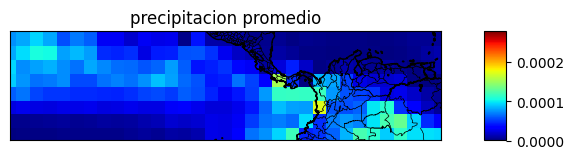

In [26]:
#creamos el mapa base
mp = Basemap(projection='merc',
             llcrnrlat= 0, #6.582796, 
             llcrnrlon= 240, #-75.530827 ,
             urcrnrlat= 15, #6.716647 ,
             urcrnrlon= 300, #-75.379985, 
             resolution= 'i')


#vamos a crear una cuadricula
lon , lat = np.meshgrid(lons,lats)
x,y = mp(lon, lat)

C_scale = mp.pcolor(x,y,np.squeeze(preci[3, : , :]), cmap = 'jet' )
c_bar = mp.colorbar(C_scale , location= 'right', pad = '10%' )




mp.drawcoastlines()
mp.drawcounties()
mp.drawcountries()
mp.drawstates()
plt.title('precipitacion promedio')
plt.show()


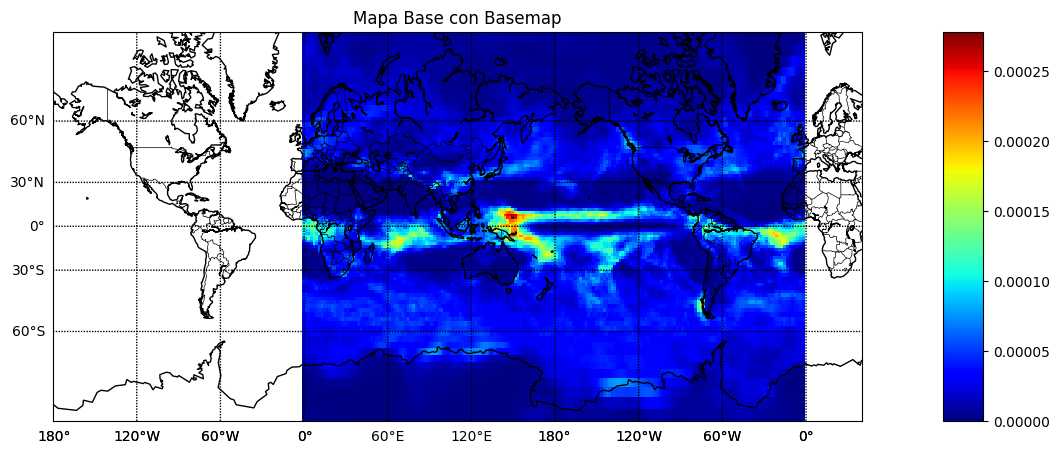

In [23]:
# Crear una instancia de Basemap
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=400)

# Crear una figura de Matplotlib
fig = plt.figure(figsize=(12, 9))

# Dibuja líneas de la costa y fronteras políticas
m.drawcoastlines()
m.drawcountries()


lon , lat = np.meshgrid(lons,lats)
x,y = m(lon, lat)
C_scale = m.pcolor(x,y,np.squeeze(preci[3, : , :]), cmap = 'jet' )
c_bar = m.colorbar(C_scale , location= 'right', pad = '10%' )

# Dibujar meridianos y paralelos
m.drawmeridians(range(-180, 200, 60), labels=[0, 0, 0, 1])
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0])

# Mostrar el mapa
plt.title("Mapa Base con Basemap")
plt.show()

# Extraccion de un lugar en especifico

In [73]:
import numpy as np
import xarray as xr

# Abre el archivo NetCDF
netcdf_file = './archivos/1850.nc'  # Reemplaza 'archivo.nc' con la ruta de tu archivo NetCDF
dataset = xr.open_dataset(netcdf_file)


lat_min, lat_max = 0 , 15 # Define los límites de latitud
lon_min, lon_max =  290 , 300    # Define los límites de longitud



# Recorta la región de interés
subset = dataset.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))





xr.Dataset.to_netcdf(subset , './archivos/extraccion.nc')


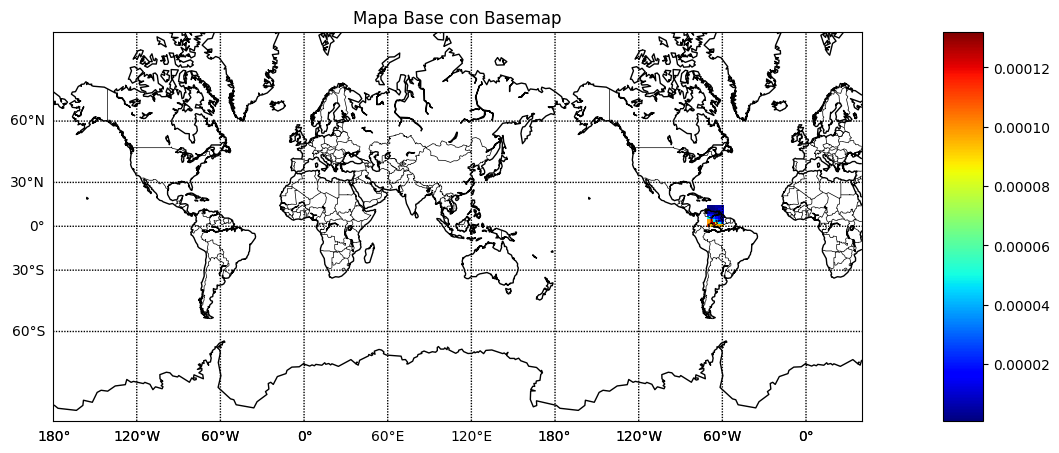

In [74]:
# Crear una instancia de Basemap


lons = subset.variables['lon'][:]
lats = subset.variables['lat'][:]
time = subset.variables['time'][:]
preci = subset.variables['pr'][:]

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=400)



# Crear una figura de Matplotlib
fig = plt.figure(figsize=(12, 9))

# Dibuja líneas de la costa y fronteras políticas
m.drawcoastlines()
m.drawcountries()


lon , lat = np.meshgrid(lons,lats)
x,y = m(lon, lat)
C_scale = m.pcolor(x,y,np.squeeze(preci[3, : , :]), cmap = 'jet' )
c_bar = m.colorbar(C_scale , location= 'right', pad = '10%' )

# Dibujar meridianos y paralelos
m.drawmeridians(range(-180, 200, 60), labels=[0, 0, 0, 1])
m.drawparallels(range(-90, 91, 30), labels=[1, 0, 0, 0])

# Mostrar el mapa
plt.title("Mapa Base con Basemap")
plt.show()

## Y si lo intentamos con un shape

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
import regionmask

# Cargar el archivo NetCDF de precipitación
nc_file = '../netCDF/1990.nc'
data = xr.open_dataset(nc_file)


# Cargar el shapefile de Antioquia
shapefile_path = '../SHAPES/antioquia.shp'
gdf = gpd.read_file(shapefile_path)
pr = data.sel(lat=slice(4, 10), lon=slice(282, 287), time = slice('1999-01-01','1999-12-31'))
poly = regionmask.Regions((list(np.array(gdf.geometry))))
maskss = poly.mask(pr.isel(time = 0), lat_name= 'latitude', lon_name = 'longitude')
pr_mask = pr.where(maskss = 0)

In [2]:
import geopandas as gpd
import rioxarray
import xarray as xr
# Cargar el archivo NetCDF de precipitación
nc_file = '../netCDF/1990.nc'
data = xr.open_dataset(nc_file)

shapefile = '../SHAPES/antioquia.shp'

# Cargar el shapefile con geopandas
gdf = gpd.read_file(shapefile)

# Recortar el archivo NetCDF utilizando el shapefile
data_subset = data.rio.clip(gdf.geometry, gdf.crs)

# Guardar el archivo NetCDF recortado
data_subset.to_netcdf('archivo_recortado.nc')

MissingSpatialDimensionError: x dimension not found. 'rio.set_spatial_dims()' or using 'rename()' to change the dimension name to 'x' can address this. Data variable: time_bnds